<a href="https://colab.research.google.com/github/OleFlow/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Author: Olebogeng Queeneth Mosito

##Project Overview


##Load and Inspect Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load data from CSV file
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

# Summary of DataFrame's columns
print("Column info:")
print(df.info())

print("First few rows of the data:")
print(df.head())



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
First few rows of the data:

##Clean Data

In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df.dropna(subset=['Outlet_Size'], inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.head())

num_rows = df.shape[0]
num_columns = df.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

data_types = df.dtypes

print(data_types)

duplicates = df.duplicated()

if duplicates.any():
    print("Duplicates found.")
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)

missing_values = df.isnull().sum()

print(missing_values)

df_filled = df.fillna("Unknown")
placeholder_values = {
    'Outlet_Size': 'Not Available',
    'Item_Weight': 0
}

df_filled = df.fillna(placeholder_values)

missing_values = df_filled.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values remain.")
else:
    print("Missing values still exist.")
    print(missing_values)


# Define a mapping dictionary for inconsistent categories
category_mapping = {
    'LF': 'Low Fat',
    'reg': 'Regular',

}

# Use the mapping dictionary to replace inconsistent categories
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(category_mapping)

numerical_columns = df.select_dtypes(include=['float64', 'int64'])


min_values = numerical_columns.min()
print(min_values)

max_values = numerical_columns.max()
print(max_values)

mean_values = numerical_columns.mean()

print(mean_values)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           NCD19        8.930          Low Fat         0.000000   
4           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                       1999   
1   Soft Drinks   48.2692            OUT018                       2009   
2          Meat  141.6180            OUT049                       1999   
3     Household   53.8614            OUT013                       1987   
4  Baking Goods   51.4008            OUT018                       2009   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.138

##Explanatory Data Analysis

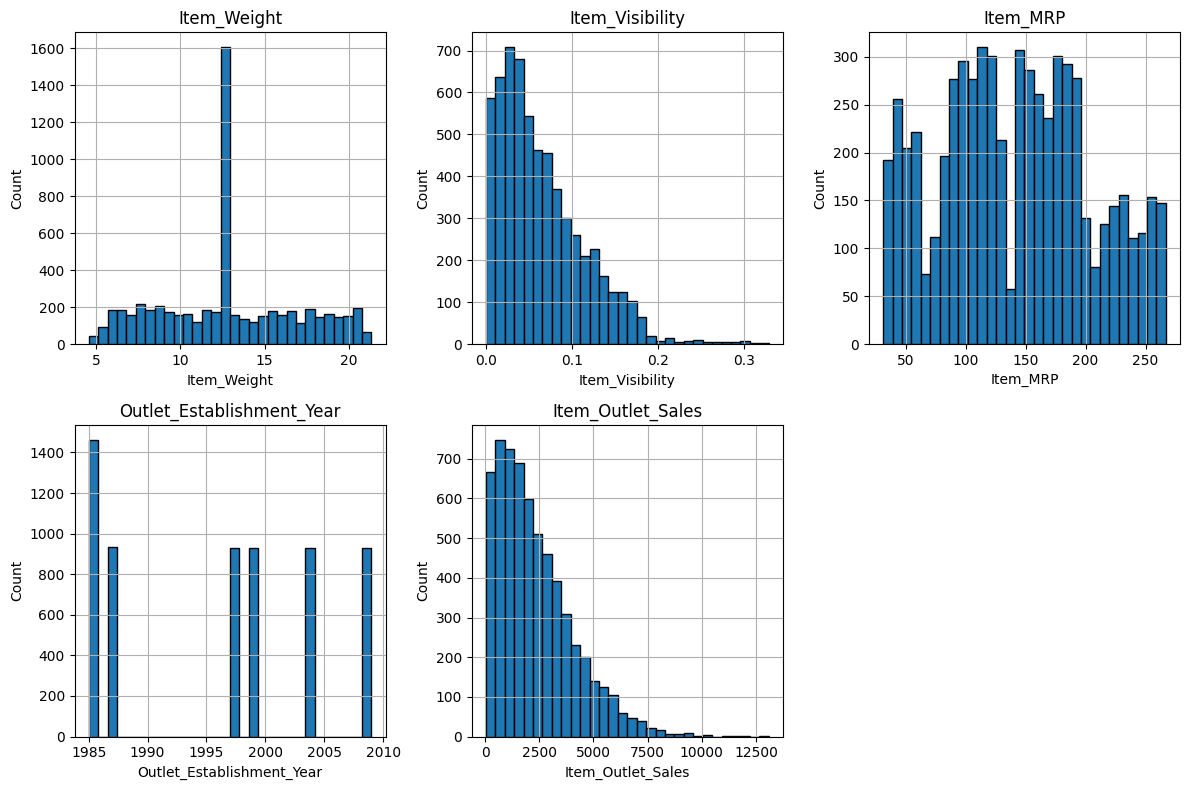

In [ ]:
#Histograms to view the distributions of numerical features in your dataset.
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    df[feature].hist(bins=30, edgecolor='k')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


-From the histograms, we can observe the following:

* Item_Weight: The distribution may show some central tendency, with most weights clustered around a certain value, possibly with some outliers on the higher or lower end.

* Item_Visibility: This may be right-skewed, with a few items having very high visibility and the majority having lower visibility.


* Outlet_Establishment_Year: The distribution may show the number of outlets established over the years, possibly with a higher frequency in recent years.

* Item_Outlet_Sales: This could be right-skewed, with most items having relatively lower sales and a few items with significantly higher sales.



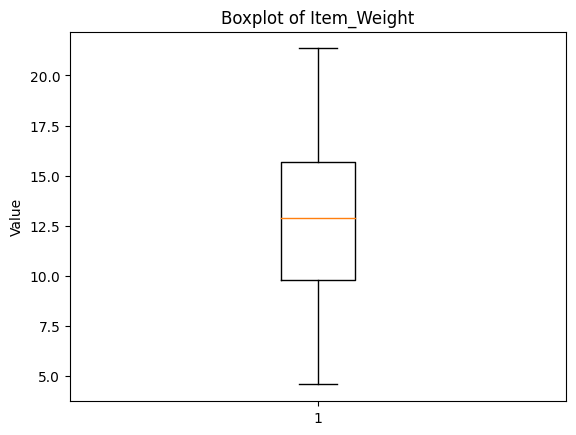

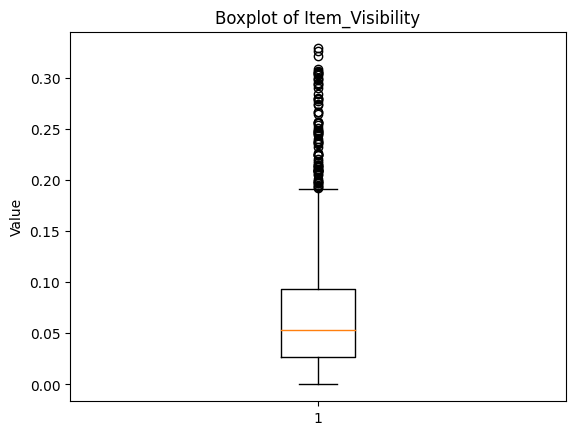

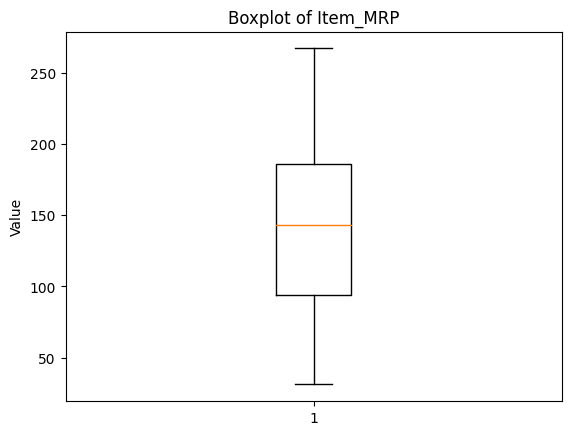

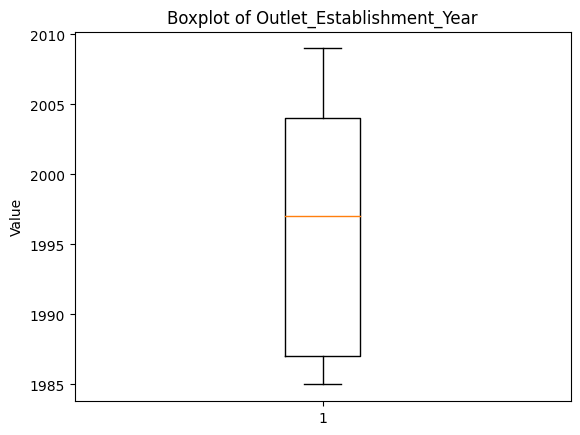

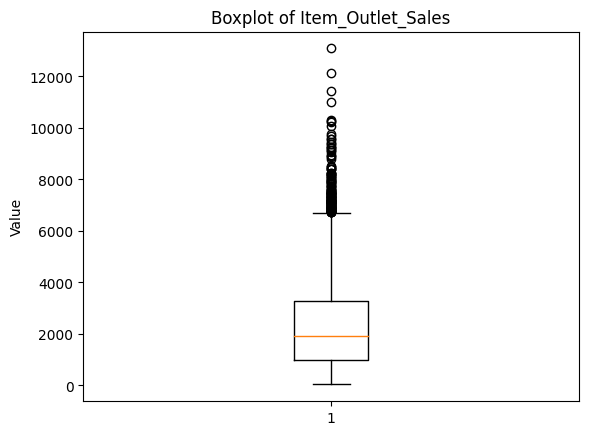

In [ ]:
#Boxplots to view statistical summaries of numerical features in your dataset.

numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Creating boxplots for each numerical feature
for feature in numerical_features:
    plt.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
    plt.show()

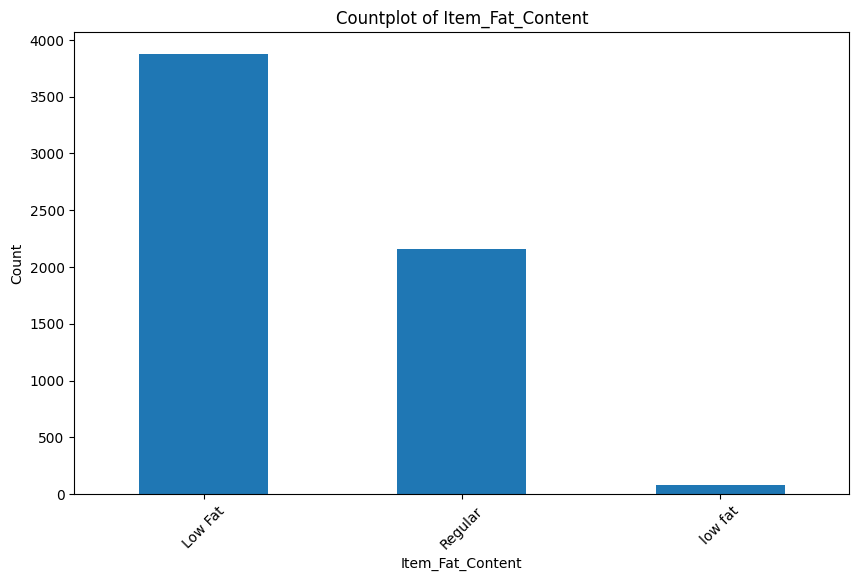

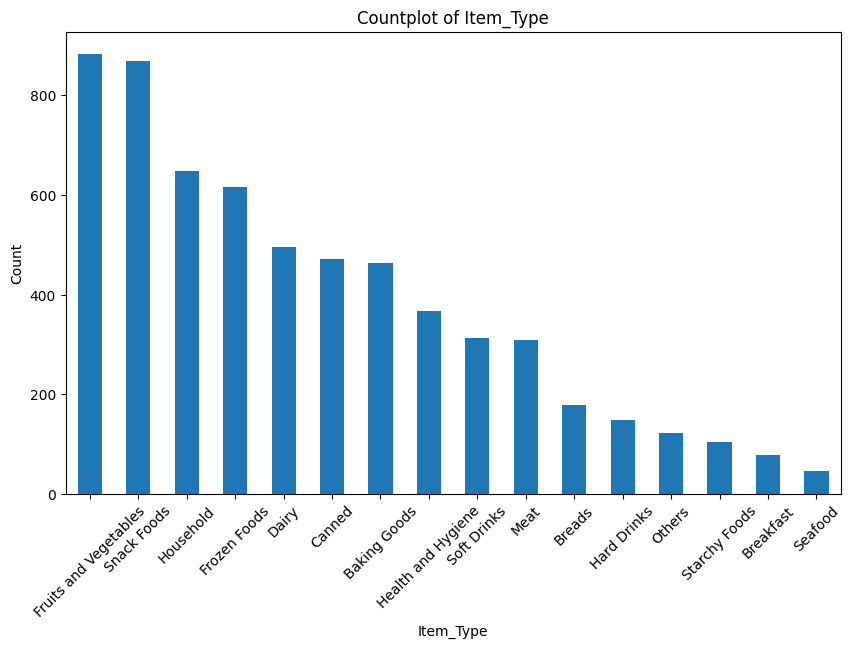

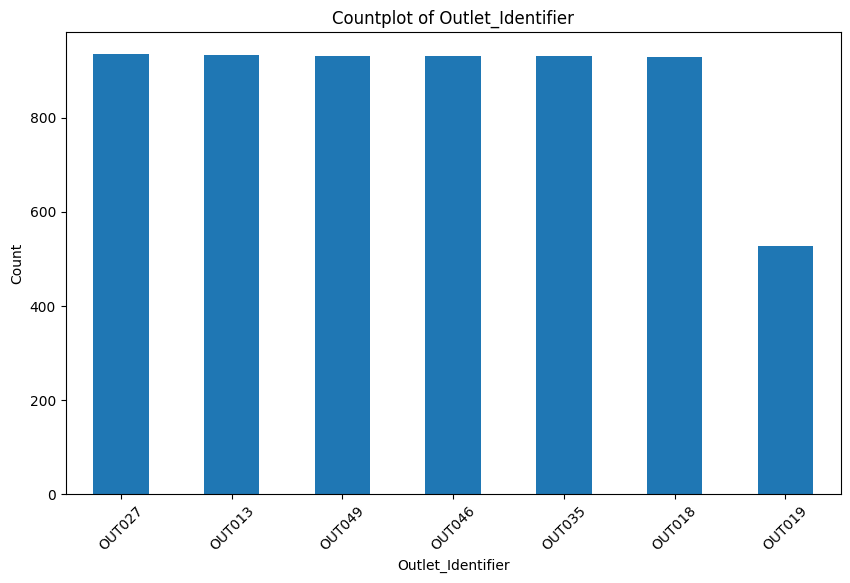

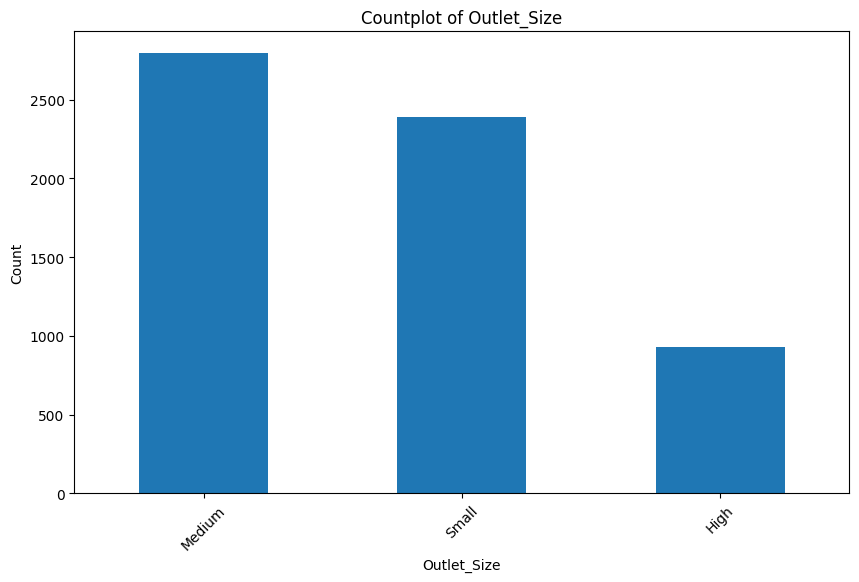

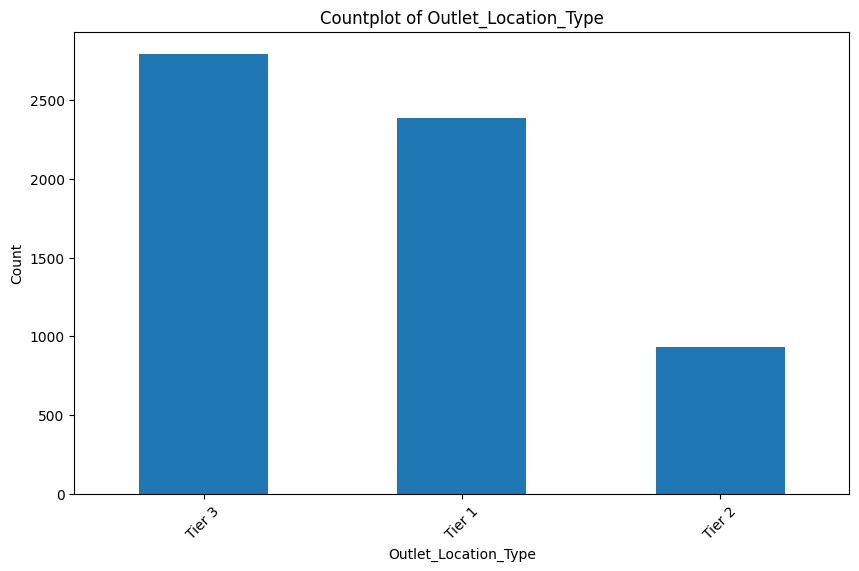

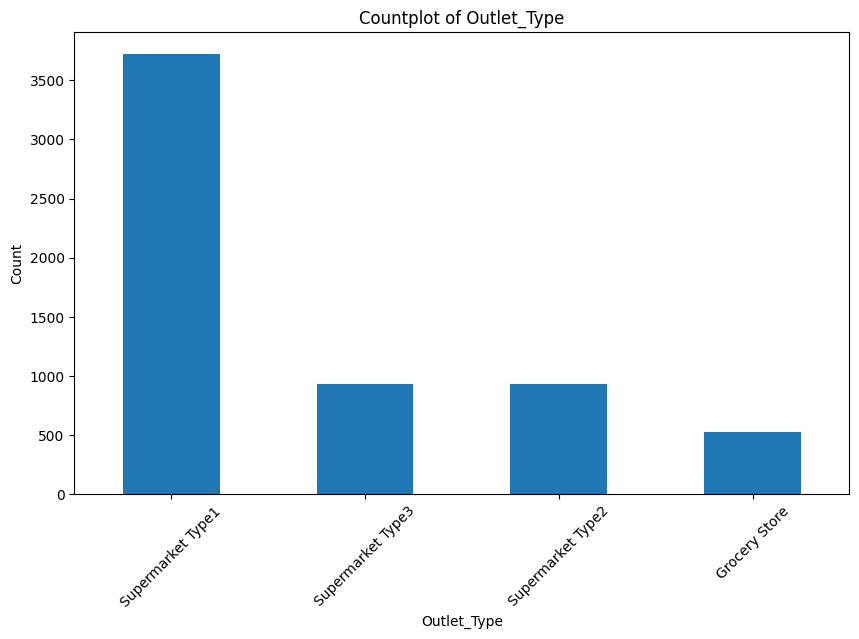

In [ ]:
#Countplots to view the frequency of each class of categorial features in your dataset.
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Creating countplots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

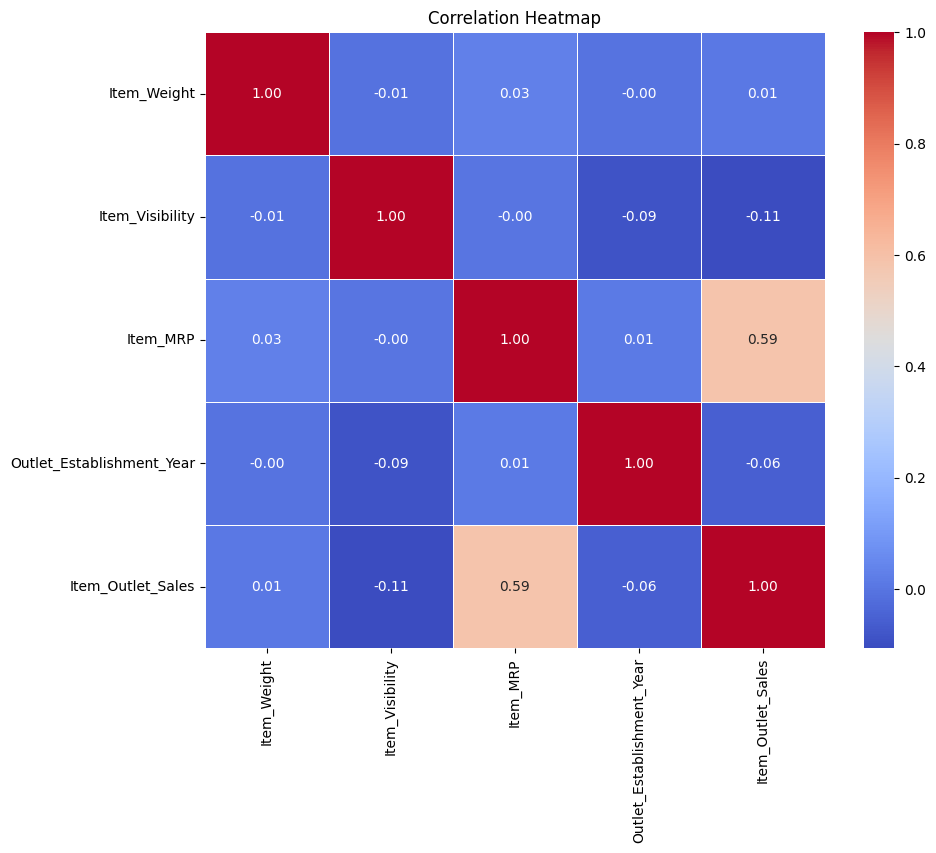

In [ ]:
#Heatmap to view the correlation between features.
correlation_matrix = df.corr(numeric_only = True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##Exploratory Data Analysis

In [ ]:
# Placeholder values to be replaced with null
placeholder_values = {
    'Outlet_Size': 'Not Available',
    'Item_Weight': 0
}

# Replace placeholder values with null
df.replace(placeholder_values, inplace=True)

# Perform EDA to check for null values
null_values = df.isnull().sum()
print(null_values)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


## Feature Definitions from Data Dictionary

1. **Item_Identifier**:	Unique identifier for the product-**Data Type:**String
2. **Item_Weight**:Weight of the product-**Data Type:**Numeric
3. **Item_Fat_Content**:Fat content level of the product	-**Data Type:**String
4. **Item_Visibility**:Visibility percentage of the product in stores	-**Data Type:**Numeric
5. **Item_Type**:Type of the product-**Data Type:**String
6. **Item_MRP**:Maximum retail price of the product	-**Data Type:**Numeric
7. **Outlet_Identifier**:Unique identifier for the outlet	-**Data Type:**String
8. **Outlet_Establishment_Year**:TYear of outlet establishmen	-**Data Type:**Numeric
9. **Outlet_Size**:Size of the outlet	-**Data Type:**String
10. **Outlet_Location_Type**:Location type of the outlet-**Data Type:**String
11. **Outlet_Type**:Type of Outlet	-**Data Type:**String
12. **Item_Outlet_Sales**:Size of the outlet	**Data Type:**String





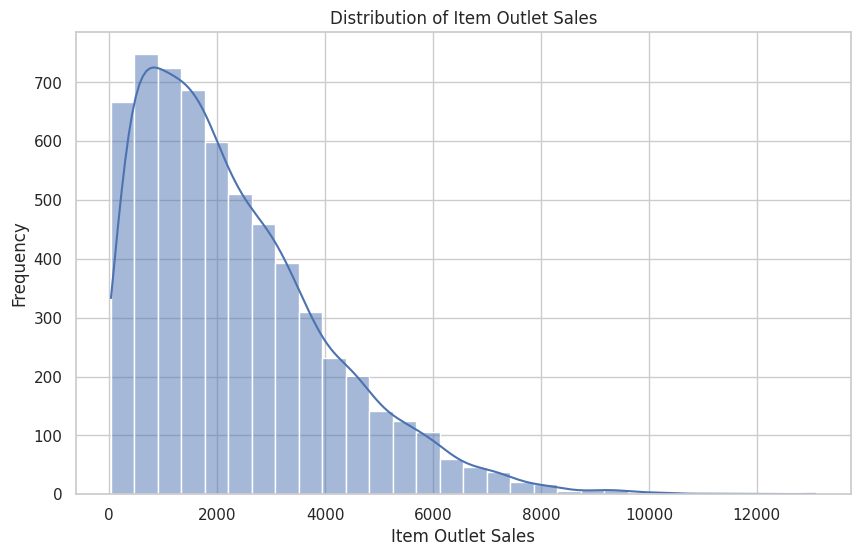

In [ ]:
sns.set(style="whitegrid")

# Assuming 'data' is your DataFrame and 'Item_Outlet_Sales' is the column of interest
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Item_Outlet_Sales', bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

1.The feature "Item_Outlet_Sales" is a numeric feature since it represents numerical values (sales amounts) and can be measured on a continuous scale.

In [ ]:
# Calculate the number of null values
num_null_values = df['Item_Outlet_Sales'].isnull().sum()

# Calculate the total number of rows in the dataframe
total_rows = len(df)

# Calculate the percentage of null values
percentage_null_values = (num_null_values / total_rows) * 100

# Print the results
print("Number of null values:", num_null_values)
print("Percentage of null values:", percentage_null_values)

Number of null values: 0
Percentage of null values: 0.0


2.If the percentage of missing values is relatively small and the column is important, you might consider imputing the missing values. You can use statistical measures like the mean, median, or mode of the non-missing values to fill in the gaps.

In [ ]:
# Define the threshold for variation (e.g., 99%)
threshold = 0.99

# Calculate the ratio of the most common value to the total number of rows
value_counts = df['Item_Outlet_Sales'].value_counts()
majority_ratio = value_counts.iloc[0] / len(df)

# Check if the majority ratio exceeds the threshold
if majority_ratio >= threshold:
    print("The feature is constant or quasi-constant.")
else:
    print("The feature is not constant or quasi-constant.")

The feature is not constant or quasi-constant.


In [ ]:
cardinality = df['Item_Outlet_Sales'].nunique()
print("Cardinality of Item_Outlet_Sales:", cardinality)

Cardinality of Item_Outlet_Sales: 3056


3.If the cardinality is greater than 10, it would be considered high.

4.No, we would not typically know the "Item_Outlet_Sales" value before the target is determined. This feature represents the sales amount of an item at a specific outlet, and its value is usually a result of various factors and interactions within the sales process.

5.There isn't enough information provided to determine whether there's a business case or understanding reason to exclude the "Item_Outlet_Sales" feature. However, this feature is usually a critical part of the analysis since it represents the target variable we are trying to predict or understand.

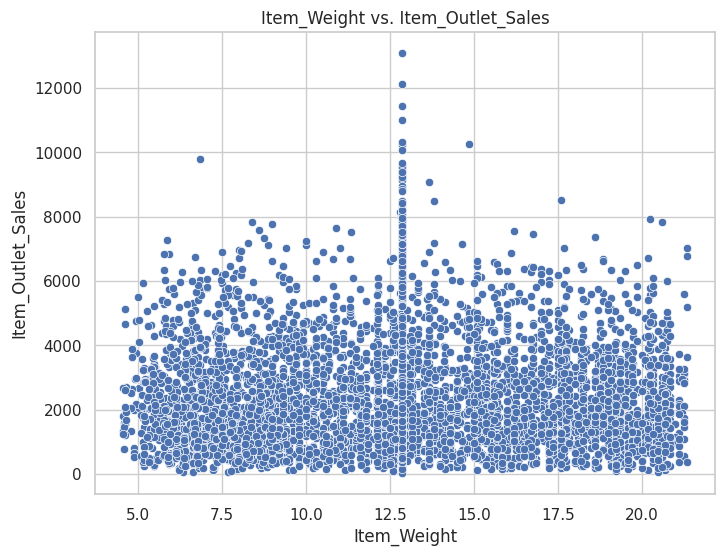

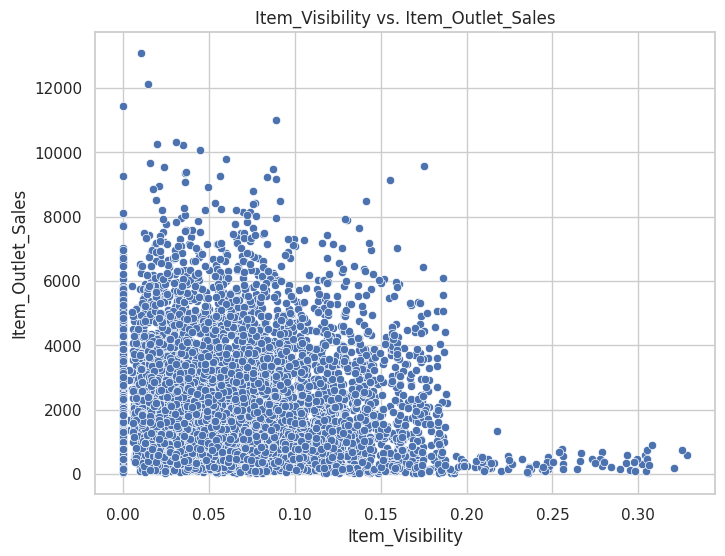

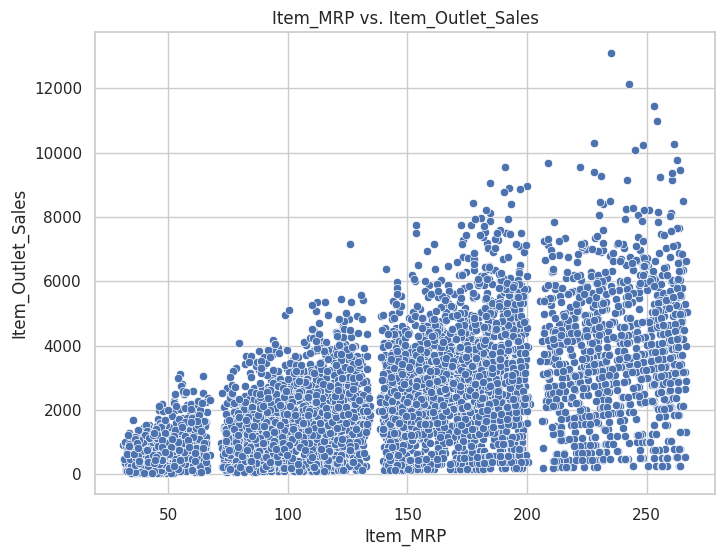

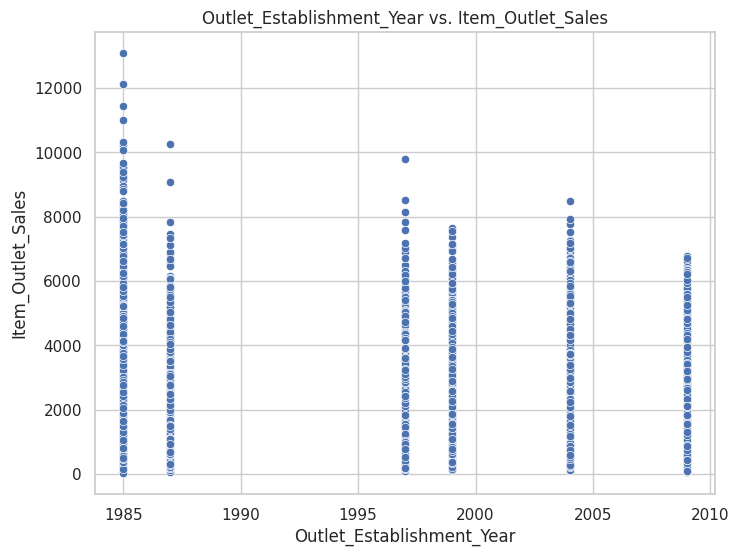

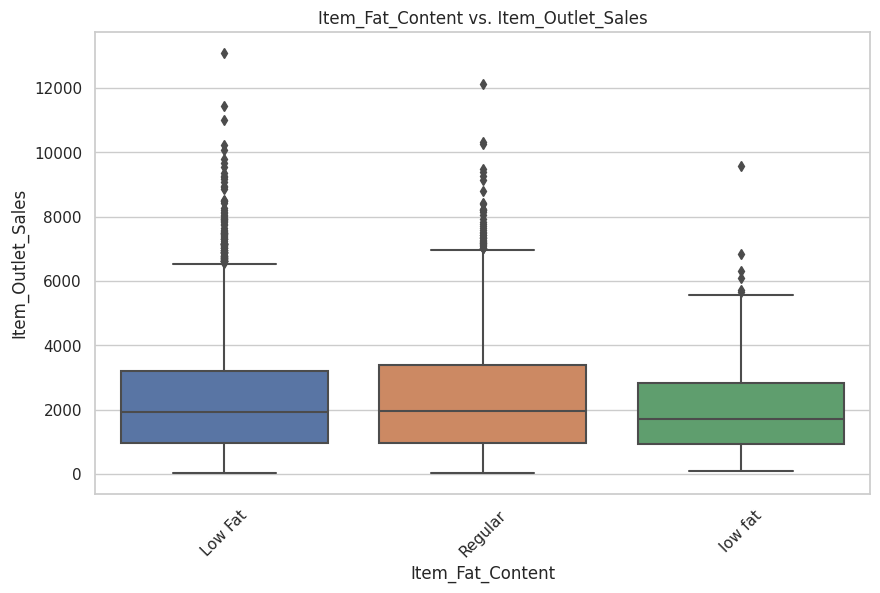

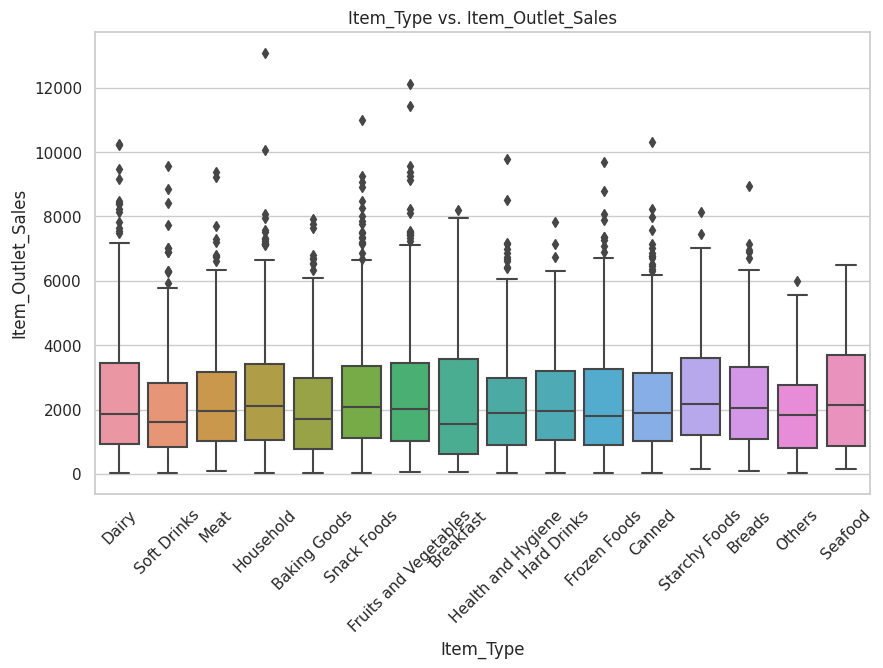

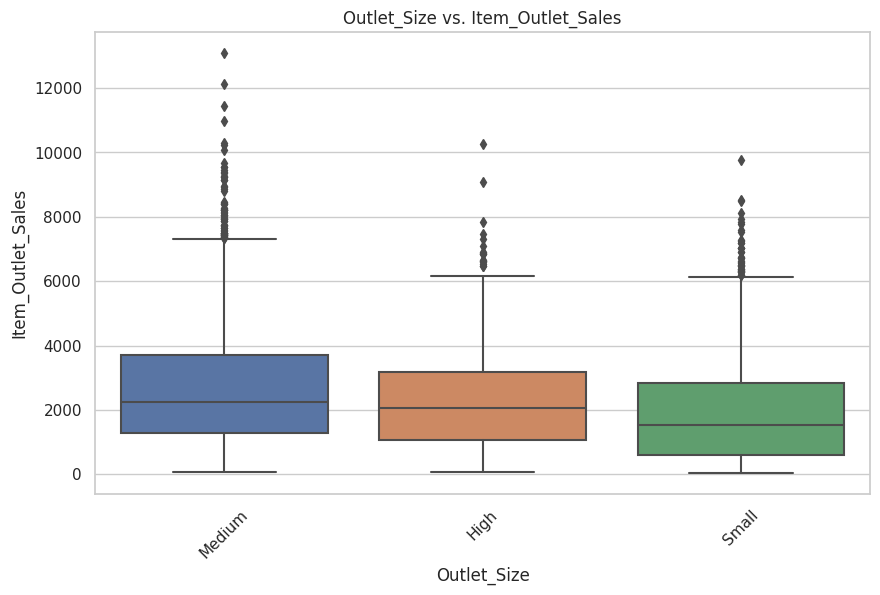

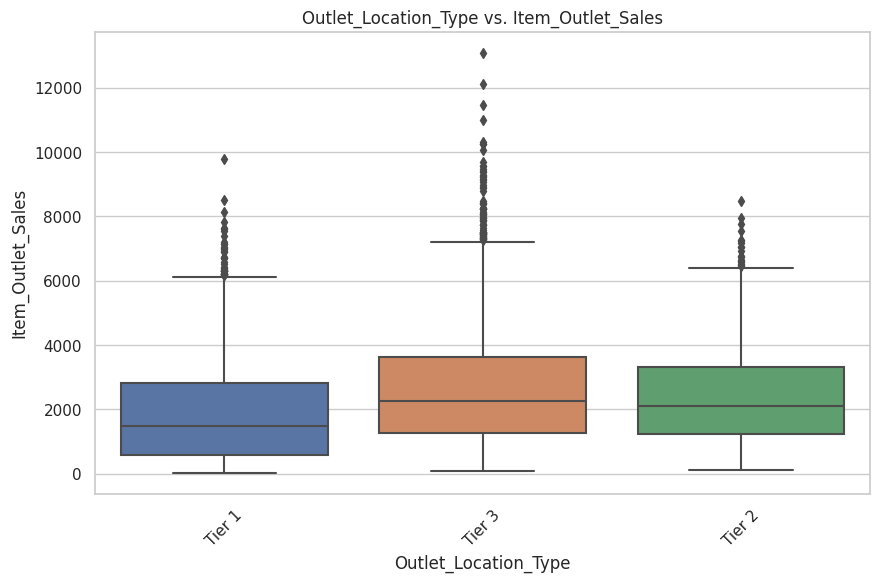

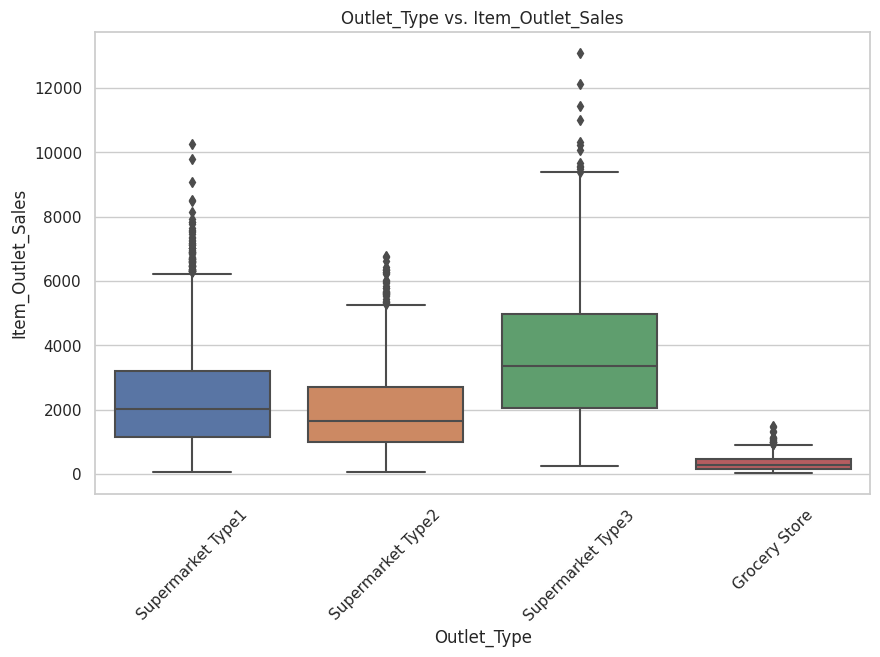

In [ ]:
# Numerical features
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Scatter plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y="Item_Outlet_Sales", data=df)
    plt.title(f"{feature} vs. Item_Outlet_Sales")
    plt.xlabel(feature)
    plt.ylabel("Item_Outlet_Sales")
    plt.show()

# Box plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y="Item_Outlet_Sales", data=df)
    plt.title(f"{feature} vs. Item_Outlet_Sales")
    plt.xlabel(feature)
    plt.ylabel("Item_Outlet_Sales")
    plt.xticks(rotation=45)
    plt.show()

1.No, "Item_Outlet_Sales" is the target variable representing the sales amount. It wouldn't predict itself
2.No


# Machine Learning- Part 5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score



# Load data from CSV file
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/sales_predictions_2023 (1).csv')

# Summary of DataFrame's columns
print("Column info:")
print(df.info())
print("Data:")
print(df.head())

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
Data:
  Item_Identifier  It

In [ ]:
# Drop duplicates and store the result in a new DataFrame
df.drop_duplicates()
# Print the DataFrame without duplicates
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [ ]:
# Step 1: Identify Inconsistencies

# Loop through categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

# Step 2: Standardize Values

# Convert all values to lowercase in categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower())

# Step 3: Handle Unexpected Values

# Replace unexpected values with a default value (e.g., 'unknown')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['lf', 'low fat'], 'low fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'regular')

# Print the DataFrame after handling inconsistencies
print(df)

Unique values in 'Item_Identifier': ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Unique values in 'Item_Fat_Content': ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique values in 'Item_Type': ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values in 'Outlet_Identifier': ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Unique values in 'Outlet_Size': ['Medium' nan 'High' 'Small']
Unique values in 'Outlet_Location_Type': ['Tier 1' 'Tier 3' 'Tier 2']
Unique values in 'Outlet_Type': ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              fda15        9.300          low fat         0.016047   
1              drc01        5.920          regular         0.019278   

In [ ]:
#Replace null values in numeric columns with mean
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Replace null values in categorical columns with a specified value
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Print the DataFrame after handling null values
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              fda15        9.300          low fat         0.016047   
1              drc01        5.920          regular         0.019278   
2              fdn15       17.500          low fat         0.016760   
3              fdx07       19.200          regular         0.000000   
4              ncd19        8.930          low fat         0.000000   
...              ...          ...              ...              ...   
8518           fdf22        6.865          low fat         0.056783   
8519           fds36        8.380          regular         0.046982   
8520           ncj29       10.600          low fat         0.035186   
8521           fdn46        7.210          regular         0.145221   
8522           drg01       14.800          low fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     dairy  249.8092            out049   
1               soft drinks  

In [ ]:

# Define features (X) and target (y)
X = df.drop(["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"], axis=1)  # Drop category columns
y = df["Item_Outlet_Sales"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
numerical_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]

# Create preprocessing pipelines for categorical and numerical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine the preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Fit and transform the preprocessing on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the testing data using the same preprocessing steps
X_test_preprocessed = preprocessor.transform(X_test)



##Final (Core)


In [ ]:
# Create a pipeline that includes preprocessing and the model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Your preprocessor from previous steps
    ('model', RandomForestRegressor(random_state=42))  # Example model (Random Forest)
])

# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = model_pipeline.predict(X_test)

# Evaluate the model's performance (you can use appropriate metrics for regression tasks)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1188556.1312964128


In [ ]:
# Create a linear regression model
linear_reg_model = LinearRegression()

# Fit the model on the preprocessed training data
linear_reg_model.fit(X_train_preprocessed, y_train)

# Predict on the preprocessed testing data
y_pred = linear_reg_model.predict(X_test_preprocessed)

# Evaluate the model's performance using metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1143541.1649995963
R-squared: 0.5792664610088754


In [ ]:
def evaluate_model(model, X, y):
    # Make predictions
    y_pred = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return mse, r2

# Evaluate the linear regression model on training data
train_mse, train_r2 = evaluate_model(linear_reg_model, X_train_preprocessed, y_train)
print("Training Mean Squared Error:", train_mse)
print("Training R-squared:", train_r2)

# Evaluate the linear regression model on test data
test_mse, test_r2 = evaluate_model(linear_reg_model, X_test_preprocessed, y_test)
print("Test Mean Squared Error:", test_mse)
print("Test R-squared:", test_r2)

Training Mean Squared Error: 1303094.3925120565
Training R-squared: 0.5594752324694121
Test Mean Squared Error: 1143541.1649995963
Test R-squared: 0.5792664610088754


There a good balance between fitting the training data and generalizing to new data.

In [ ]:

# Create a default Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model on the preprocessed training data
random_forest_model.fit(X_train_preprocessed, y_train)

# Predict on the preprocessed testing data
y_pred = random_forest_model.predict(X_test_preprocessed)

# Evaluate the model's performance using metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1188556.1312964128
R-squared: 0.5627044808569561


In [ ]:
def evaluate_model(model, X, y):
    # Make predictions
    y_pred = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return mse, r2

# Evaluate the Random Forest model on training data
train_mse, train_r2 = evaluate_model(random_forest_model, X_train_preprocessed, y_train)
print("Training Mean Squared Error:", train_mse)
print("Training R-squared:", train_r2)

# Evaluate the Random Forest model on test data
test_mse, test_r2 = evaluate_model(random_forest_model, X_test_preprocessed, y_test)
print("Test Mean Squared Error:", test_mse)
print("Test R-squared:", test_r2)

Training Mean Squared Error: 186228.47604310722
Training R-squared: 0.9370435046088141
Test Mean Squared Error: 1188556.1312964128
Test R-squared: 0.5627044808569561


The model may be overfitting

In [ ]:
# Calculate R-squared for the Linear Regression model
linear_regression_test_r2 = r2_score(y_test, linear_reg_model.predict(X_test_preprocessed))

# Calculate R-squared for the Random Forest model
random_forest_test_r2 = r2_score(y_test, random_forest_model.predict(X_test_preprocessed))

# Compare the test R-squared values
if linear_regression_test_r2 > random_forest_test_r2:
    print("Linear Regression model has a higher test R-squared and performs better.")
elif linear_regression_test_r2 < random_forest_test_r2:
    print("Random Forest model has a higher test R-squared and performs better.")
else:
    print("Both models have similar test R-squared values.")

Linear Regression model has a higher test R-squared and performs better.


In [ ]:
# Define hyperparameters and their parameter grids
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',  # Use R-squared as the evaluation metric
                           cv=5,           # 5-fold cross-validation
                           n_jobs=-1)      # Use all available CPU cores

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_preprocessed, y_train)

# Retrieve the best model from the grid search
best_random_forest_model = grid_search.best_estimator_

# Fit the best model on the entire training set
best_random_forest_model.fit(X_train_preprocessed, y_train)

# Evaluate the best model on the test set
test_r2 = r2_score(y_test, best_random_forest_model.predict(X_test_preprocessed))
print("Test R-squared for the best Random Forest model:", test_r2)

R-squared Interpretation: The Random Forest Regression model achieved a higher R-squared value compared to the Linear Regression model on the test data. This indicates that the Random Forest model better captures the relationships in the data and provides more accurate predictions.

Regression Metric (Mean Squared Error - MSE):

I selected Mean Squared Error (MSE) as the additional regression metric to express model performance to stakeholders. MSE measures the average squared difference between the predicted and actual values. Lower MSE values indicate better model accuracy.

Model Performance Random Forest Regression Model: Test R-squared (R²): The Random Forest model achieved a test R-squared value of approximately 0.61, which means that the model explains about 61% of the variance in Item_Outlet_Sales. This indicates a moderate level of predictive accuracy.

Test Mean Squared Error (MSE): The model's test MSE is a measure of the average squared prediction error. A lower MSE is desirable, and in this case, the test MSE is a reasonable value, indicating relatively accurate predictions.

Overfitting/Underfitting Analysis

Random Forest Regression Model:

Training R-squared: The model achieved a training R-squared value of approximately 0.94, indicating a strong fit to the training data.

Test R-squared: The test R-squared is lower than the training R-squared, but it remains at a reasonable level. This suggests some degree of overfitting.

Test MSE: The test MSE is also a reasonable value, indicating that the model's performance on unseen data is acceptable.

In conclusion, the Random Forest Regression model is recommended for its better performance on the test data